# Problem Statement- 
    Detecting the number of people entering and exiting a metro station using the YOLOv8 model. 
    This data will help determine the frequency of train services to accommodate passenger flow.

### Solution - 
use yolov8 model

custom dataset 
  find images and labels / annotate 
  inputs - metro stations, train stations, university, 

clean the data 
    Cleaning 
    Resize, Broken images ,Duplicates
    Cluster
    Outliers
    augmentation- blurry, dark, bright

EDA- visualize, graphs

Split dataset into 80/20

Training
    Hyper parameters 
    Fine tuning

Post processing/ testing
    Metrics
    Graphs


### Summary

In [12]:
import os

# Function to count image files in a directory
def count_images_in_directory(images_dir):
    image_extensions = ['.jpg', '.jpeg', '.png']  # Add other extensions as needed
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(tuple(image_extensions))]
    return len(image_files)

# Function to count the number of objects (of a specific class, e.g., class 1) per image from the labels
def count_class_objects_per_image(labels_dir, target_class=1):
    total_objects = 0
    total_images = 0
    class_ids = set()
    
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        with open(label_path, 'r') as f:
            labels = f.readlines()
            image_objects = 0
            for label in labels:
                class_id = int(label.strip().split()[0])  # Assuming YOLO format (class_id, x_center, y_center, width, height)
                class_ids.add(class_id)
                if class_id == target_class:  # Count only the target class (e.g., class 1 = person)
                    image_objects += 1
            total_objects += image_objects  # Total objects of the target class across all images
            total_images += 1
    
    average_objects_per_image = total_objects / total_images if total_images > 0 else 0
    return len(class_ids), total_objects, average_objects_per_image

# Summary statistics function
def summary_statistics(train_images_dir, test_images_dir, train_labels_dir, test_labels_dir, target_class=1):
    total_train_images = count_images_in_directory(train_images_dir)
    total_test_images = count_images_in_directory(test_images_dir)
    
    # Get the class count and object statistics for both train and test
    num_train_classes, total_train_objects, avg_objects_per_train_image = count_class_objects_per_image(train_labels_dir, target_class)
    num_test_classes, total_test_objects, avg_objects_per_test_image = count_class_objects_per_image(test_labels_dir, target_class)
    
    print("Summary Statistics:")
    print(f"Total Training Images: {total_train_images}")
    print(f"Total Valid Images: {total_test_images}")
    print(f"Total Images: {total_train_images + total_test_images}")
    
    # Classes and objects per image for the specific class
    print(f"\nStatistics for Class {target_class}:")
    
    print("\nTraining Data:")
    print(f"Number of Unique Classes in Training: {num_train_classes}")
    print(f"Total Class {target_class} Objects in Training Set: {total_train_objects}")
    print(f"Average Class {target_class} Objects per Training Image: {avg_objects_per_train_image:.2f}")
    
    print("\nValid Data:")
    print(f"Number of Unique Classes in Valid: {num_test_classes}")
    print(f"Total Class {target_class} Objects in Valid Set: {total_test_objects}")
    print(f"Average Class {target_class} Objects per Valid Image: {avg_objects_per_test_image:.2f}")

# Paths to image and label directories
train_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/images"
test_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/valid/images"
train_labels_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"
test_labels_dir = "C:/Users/Neha KB/Desktop/custom/c_train/valid/labels"

# Display summary statistics for class 1 (person)
summary_statistics(train_images_dir, test_images_dir, train_labels_dir, test_labels_dir, target_class=1)


Summary Statistics:
Total Training Images: 6064
Total Valid Images: 489
Total Images: 6553

Statistics for Class 1:

Training Data:
Number of Unique Classes in Training: 2
Total Class 1 Objects in Training Set: 398624
Average Class 1 Objects per Training Image: 65.74

Valid Data:
Number of Unique Classes in Valid: 2
Total Class 1 Objects in Valid Set: 30665
Average Class 1 Objects per Valid Image: 62.71


### Sample Images

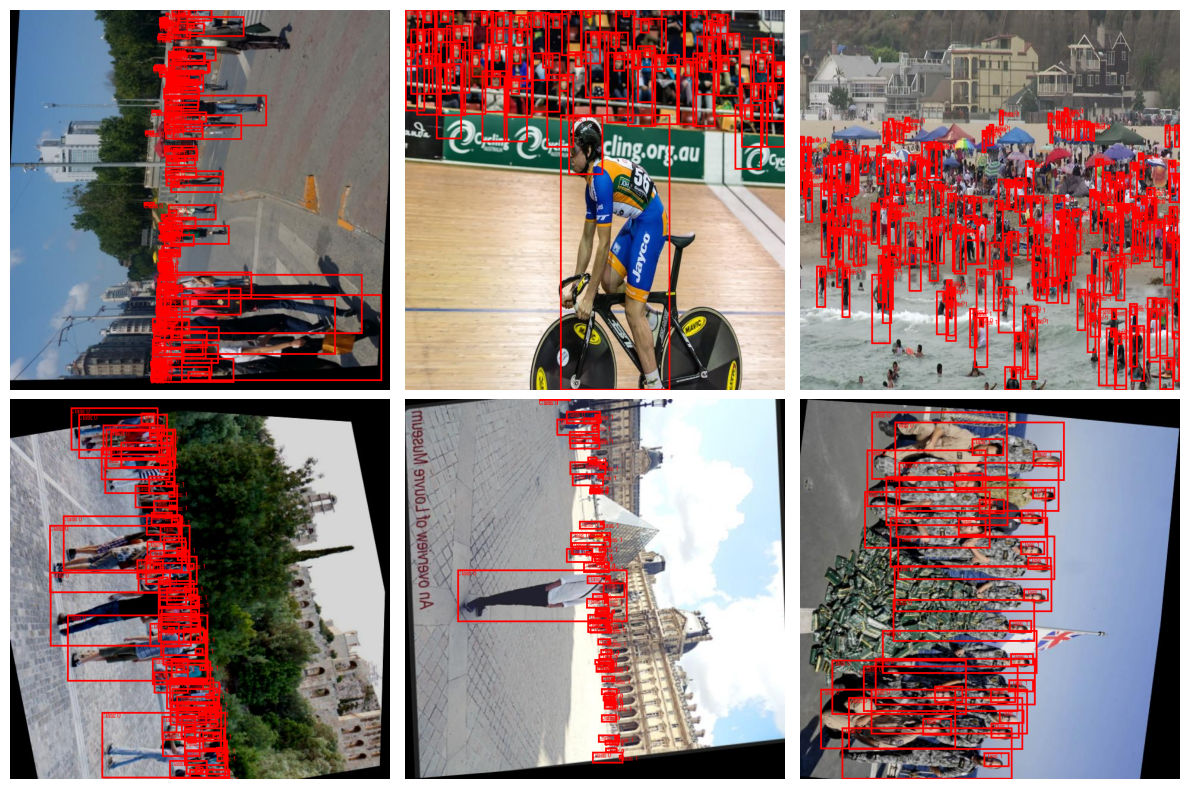

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Paths to your data directories
train_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/images"
train_labels_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"

# Function to plot bounding boxes on images
def plot_sample_images_with_bboxes(images_dir, labels_dir, num_samples=6):
    plt.figure(figsize=(12, 8))
    sample_images = np.random.choice(os.listdir(images_dir), num_samples, replace=False)
    
    for i, img_file in enumerate(sample_images):
        img_path = os.path.join(images_dir, img_file)
        label_file = img_file.replace('.jpg', '.txt')  # Assuming images are .jpg and labels are .txt
        
        # Load the image
        img = Image.open(img_path)
        draw = ImageDraw.Draw(img)
        
        # Read the corresponding label file
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            labels = f.readlines()
        
        # Draw bounding boxes from labels
        for label in labels:
            class_id, x_center, y_center, width, height = map(float, label.strip().split())
            
            # Image dimensions
            img_width, img_height = img.size
            
            # Convert normalized coordinates to absolute pixel values
            x_center_abs = x_center * img_width
            y_center_abs = y_center * img_height
            width_abs = width * img_width
            height_abs = height * img_height
            
            # Calculate the top-left and bottom-right coordinates of the bounding box
            x_min = int(x_center_abs - width_abs / 2)
            y_min = int(y_center_abs - height_abs / 2)
            x_max = int(x_center_abs + width_abs / 2)
            y_max = int(y_center_abs + height_abs / 2)
            
            # Draw the bounding box on the image
            draw.rectangle([x_min, y_min, x_max, y_max], outline="red", width=3)
            
            # Optionally, add class label near the bounding box
            draw.text((x_min, y_min), f'Class: {int(class_id)}', fill="red")
        
        # Plot the image with bounding boxes
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

# Plot sample images with bounding boxes from the training set
plot_sample_images_with_bboxes(train_images_dir, train_labels_dir)


Image dimension

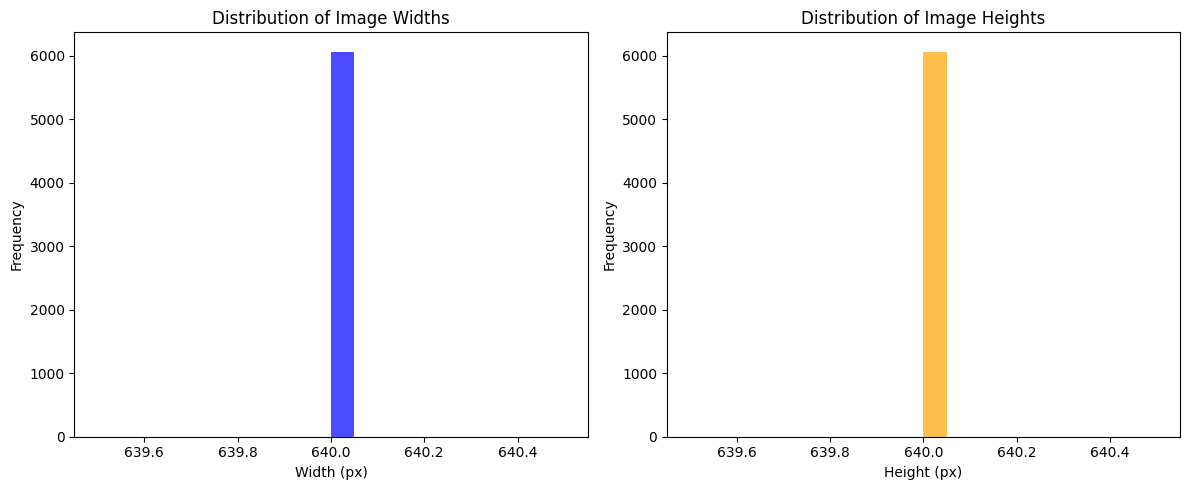

In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Paths to your data directories
train_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/images"

# Function to get image dimensions
def get_image_dimensions(images_dir):
    dimensions = []
    for img_file in os.listdir(images_dir):
        if img_file.endswith('.jpg'):  # Adjust if your images are in a different format
            img_path = os.path.join(images_dir, img_file)
            with Image.open(img_path) as img:
                dimensions.append(img.size)  # img.size returns (width, height)
    return dimensions

# Get dimensions of training images
image_dimensions = get_image_dimensions(train_images_dir)

# Extract width and height
widths, heights = zip(*image_dimensions)

# Plot histogram of image dimensions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width (px)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height (px)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Distribution of people in images

Total Train Images: 6064
Total Test Images: 489


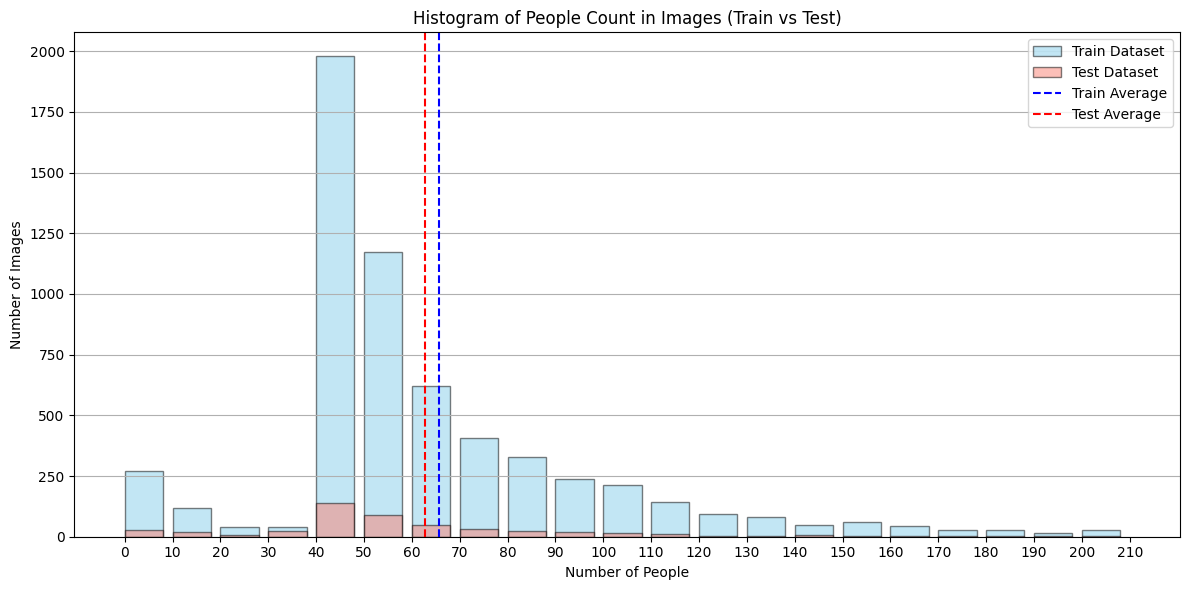

In [15]:
import os
import matplotlib.pyplot as plt

def load_labels(labels_folder):
    """Loads YOLO label files and counts only the bounding boxes of class '1'."""
    label_files = [f for f in os.listdir(labels_folder) if f.endswith('.txt')]
    bounding_box_counts = []

    for label_file in label_files:
        label_path = os.path.join(labels_folder, label_file)
        with open(label_path, 'r') as file:
            # Filter only the bounding boxes labeled as class '1'
            boxes = [line for line in file.readlines() if line.startswith('1')]
            bounding_box_counts.append(len(boxes))

    return bounding_box_counts, len(label_files)  # Return counts and number of images

def plot_people_distribution(train_counts, test_counts):
    """Plots a histogram of the distribution of images across the defined categories for train and test datasets."""
    plt.figure(figsize=(12, 6))

    # Create histogram bins for the x-axis (0-200, with increments of 10)
    bins = list(range(0, 211, 10))  # 0 to 200, with a bin for each increment of 10

    # Plot histograms
    plt.hist(train_counts, bins=bins, alpha=0.5, label='Train Dataset', color='skyblue', edgecolor='black', width=8)
    plt.hist(test_counts, bins=bins, alpha=0.5, label='Test Dataset', color='salmon', edgecolor='black', width=8)

    # Calculate averages
    average_train = sum(train_counts) / len(train_counts) if train_counts else 0
    average_test = sum(test_counts) / len(test_counts) if test_counts else 0
    overall_average = (average_train + average_test) / 2

    # Draw average lines
    plt.axvline(x=average_train, color='blue', linestyle='--', label='Train Average')
    plt.axvline(x=average_test, color='red', linestyle='--', label='Test Average')

    plt.title('Histogram of People Count in Images (Train vs Test)')
    plt.xlabel('Number of People')
    plt.ylabel('Number of Images')
    plt.xticks(bins)  # Set x-ticks to match bins
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def main():
    train_labels_folder = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Path to YOLO label folder for train
    test_labels_folder = "C:/Users/Neha KB/Desktop/custom/c_train/valid/labels"  # Path to YOLO label folder for test

    # Load bounding box counts for class '1' from YOLO label files
    train_bounding_box_counts, total_train_images = load_labels(train_labels_folder)
    test_bounding_box_counts, total_test_images = load_labels(test_labels_folder)

    # Print the number of images processed
    print(f"Total Train Images: {total_train_images}")
    print(f"Total Test Images: {total_test_images}")

    # Plot the distribution of images for both datasets
    plot_people_distribution(train_bounding_box_counts, test_bounding_box_counts)

if __name__ == "__main__":
    main()


### Class Distribution (Heads vs Persons)


C:\Users\Neha KB\AppData\Local\Temp\ipykernel_17236\1601291535.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")


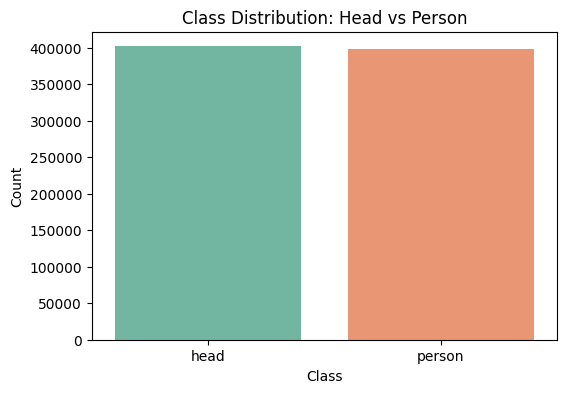

In [16]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to your data directories
train_labels_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/labels"

# Function to calculate class distribution
def plot_class_distribution(labels_dir):
    class_counts = {"head": 0, "person": 0}
    
    # Loop through all label files
    for label_file in os.listdir(labels_dir):
        with open(os.path.join(labels_dir, label_file), 'r') as f:
            labels = f.readlines()
            for label in labels:
                class_id = int(label.strip().split()[0])  # Assuming first value is class_id
                
                # Assuming class_id 0 is 'head' and class_id 1 is 'person'
                if class_id == 0:
                    class_counts["head"] += 1
                elif class_id == 1:
                    class_counts["person"] += 1
    
    # Plot class distribution
    plt.figure(figsize=(6, 4))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="Set2")
    plt.title('Class Distribution: Head vs Person')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Call the function
plot_class_distribution(train_labels_dir)


### Density map

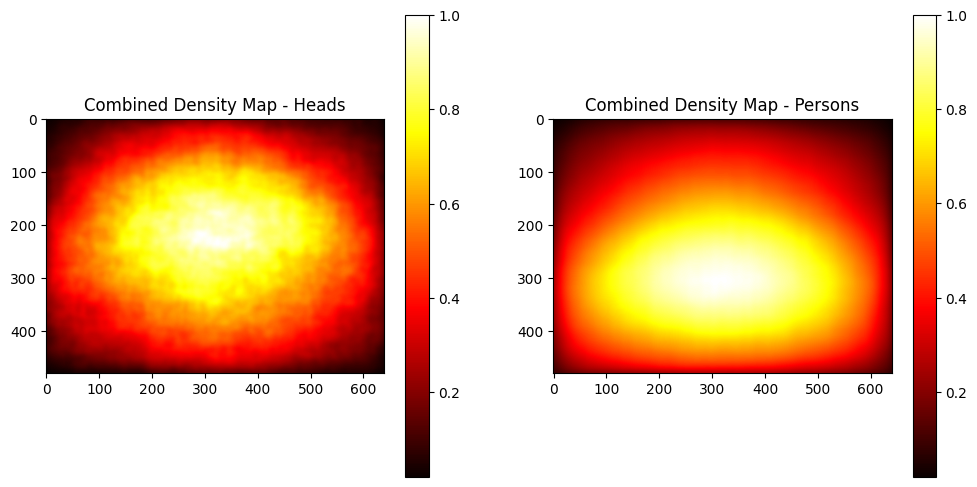

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

# Parameters
image_width, image_height = 640, 480  # Size of the density map
folder_path ="C:/Users/Neha KB/Desktop/custom/c_train/train/labels"  # Directory containing the text files

# Function to create density maps for given class labels
def create_density_maps_from_file(file_path):
    density_map_person = np.zeros((image_height, image_width), dtype=np.float32)
    density_map_head = np.zeros((image_height, image_width), dtype=np.float32)

    with open(file_path, 'r') as file:
        for line in file:
            label, x_center, y_center, width, height = map(float, line.split())
            if label == 1:  # Class 1 for 'person'
                # Convert from normalized to pixel coordinates
                x_center_pixel = int(x_center * image_width)
                y_center_pixel = int(y_center * image_height)
                width_pixel = int(width * image_width)
                height_pixel = int(height * image_height)

                # Define the bounding box
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(image_width - 1, x_center_pixel + width_pixel // 2)
                y2 = min(image_height - 1, y_center_pixel + height_pixel // 2)

                # Increment the density map for 'person'
                density_map_person[y1:y2, x1:x2] += 1

            elif label == 0:  # Class 0 for 'head'
                # Convert from normalized to pixel coordinates
                x_center_pixel = int(x_center * image_width)
                y_center_pixel = int(y_center * image_height)
                width_pixel = int(width * image_width)
                height_pixel = int(height * image_height)

                # Define the bounding box
                x1 = max(0, x_center_pixel - width_pixel // 2)
                y1 = max(0, y_center_pixel - height_pixel // 2)
                x2 = min(image_width - 1, x_center_pixel + width_pixel // 2)
                y2 = min(image_height - 1, y_center_pixel + height_pixel // 2)

                # Increment the density map for 'head'
                density_map_head[y1:y2, x1:x2] += 1

    # Normalize the density maps for visualization
    density_map_person = cv2.GaussianBlur(density_map_person, (15, 15), 0)
    density_map_person /= density_map_person.max() if density_map_person.max() > 0 else 1  # Avoid division by zero

    density_map_head = cv2.GaussianBlur(density_map_head, (15, 15), 0)
    density_map_head /= density_map_head.max() if density_map_head.max() > 0 else 1  # Avoid division by zero

    return density_map_person, density_map_head

# Initialize lists to hold density maps
all_density_maps_person = []
all_density_maps_head = []

# Loop through all text files in the specified directory
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        density_map_person, density_map_head = create_density_maps_from_file(file_path)
        all_density_maps_person.append(density_map_person)
        all_density_maps_head.append(density_map_head)

# Combine density maps for 'person' and 'head' by summing them up
combined_density_map_person = np.sum(all_density_maps_person, axis=0)
combined_density_map_head = np.sum(all_density_maps_head, axis=0)

# Normalize the combined density maps for visualization
combined_density_map_person = cv2.GaussianBlur(combined_density_map_person, (15, 15), 0)
combined_density_map_person /= combined_density_map_person.max() if combined_density_map_person.max() > 0 else 1  # Avoid division by zero

combined_density_map_head = cv2.GaussianBlur(combined_density_map_head, (15, 15), 0)
combined_density_map_head /= combined_density_map_head.max() if combined_density_map_head.max() > 0 else 1  # Avoid division by zero

# Display the combined density maps
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(combined_density_map_person, cmap='hot')
plt.colorbar()
plt.title('Combined Density Map - Heads')

plt.subplot(1, 2, 2)
plt.imshow(combined_density_map_head, cmap='hot')
plt.colorbar()
plt.title('Combined Density Map - Persons')

plt.show()

### PCA  and t-SNE 

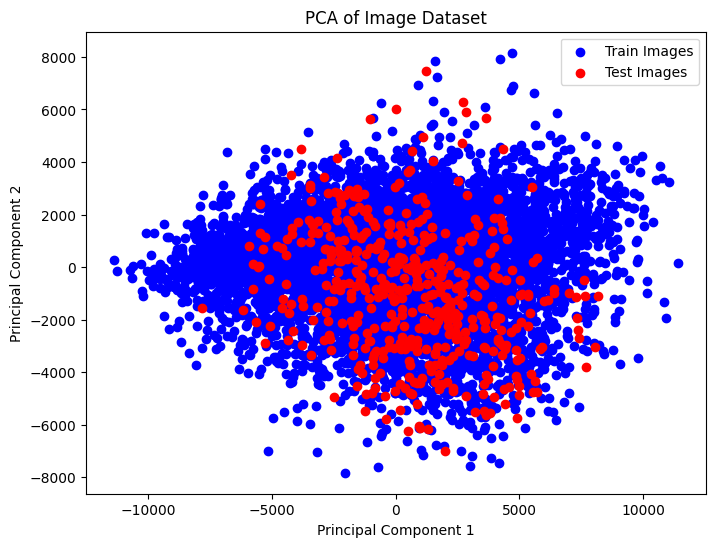

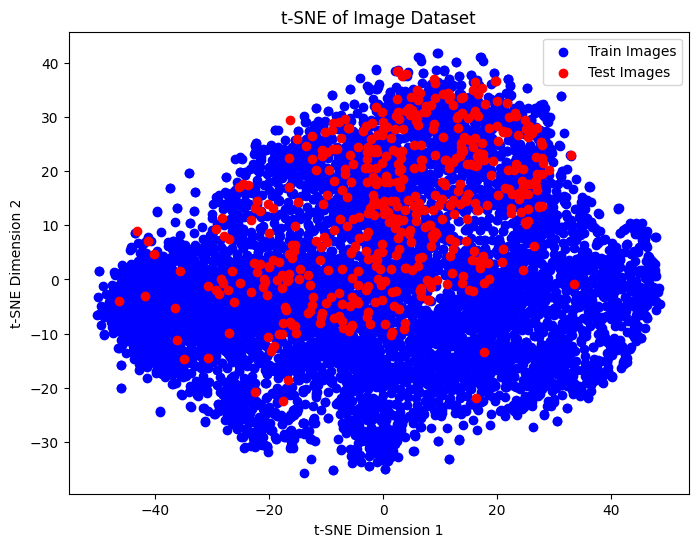

In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Paths to train and test images directories
train_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/train/images"
test_images_dir = "C:/Users/Neha KB/Desktop/custom/c_train/valid/images"

# Function to load images from a directory
def load_images_from_directory(image_dir, image_size=(64, 64)):
    images = []
    for image_file in os.listdir(image_dir):
        if image_file.endswith(('.jpg')):
            img_path = os.path.join(image_dir, image_file)
            img = Image.open(img_path).resize(image_size)  # Resize to uniform size
            img_array = np.array(img).flatten()  # Flatten the image into a 1D vector
            images.append(img_array)
    return np.array(images)

# Load images
train_images = load_images_from_directory(train_images_dir)
test_images = load_images_from_directory(test_images_dir)

# Combine train and test images
all_images = np.concatenate((train_images, test_images), axis=0)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_images_pca = pca.fit_transform(all_images)

# Visualize PCA result
plt.figure(figsize=(8, 6))
plt.scatter(reduced_images_pca[:len(train_images), 0], reduced_images_pca[:len(train_images), 1], color='blue', label='Train Images')
plt.scatter(reduced_images_pca[len(train_images):, 0], reduced_images_pca[len(train_images):, 1], color='red', label='Test Images')
plt.title('PCA of Image Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2)
reduced_images_tsne = tsne.fit_transform(all_images)

# Visualize t-SNE result
plt.figure(figsize=(8, 6))
plt.scatter(reduced_images_tsne[:len(train_images), 0], reduced_images_tsne[:len(train_images), 1], color='blue', label='Train Images')
plt.scatter(reduced_images_tsne[len(train_images):, 0], reduced_images_tsne[len(train_images):, 1], color='red', label='Test Images')
plt.title('t-SNE of Image Dataset')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
